Veamos los datos de entrenamiento: 

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

El flujo de trabajo será el siguiente: Primero, alimentaremos a la red neuronal con los datos de entrenamiento, train_images y train_labels. 
La red luego aprenderá a asociar imágenes y etiquetas. 
Finalmente, le pediremos a la red que produzca predicciones para test_images, y verificaremos si estas predicciones coinciden con las etiquetas de test_labels.

Construyamos la red; nuevamente, recuerde que no se espera que comprenda todo sobre este ejemplo.
El componente básico de las redes neuronales es la capa, un módulo de procesamiento de datos que puede considerarse como un filtro de datos.
Algunos datos entran y salen de una forma más útil. Específicamente, las capas extraen representaciones de los datos introducidos en ellas, con suerte, representaciones que son más significativas para el problema en cuestión. 
La mayor parte del aprendizaje profundo consiste en encadenar capas simples que implementarán una forma de destilación progresiva de datos. Un modelo de aprendizaje profundo es como un tamiz para el procesamiento de datos, hecho de una sucesión de filtros de datos cada vez más refinados: las capas.

Aquí, nuestra red consiste en una secuencia de dos capas densas, que son capas neurales densamente conectadas (también llamadas completamente conectadas). La segunda (y última) capa es una capa softmax de 10 vías, lo que significa que devolverá una matriz de 10 puntajes de probabilidad (que sumados hacen un total de 1). 

Cada puntaje será la probabilidad de que la imagen de dígitos actual pertenezca a una de nuestras clases de 10 dígitos.


In [3]:
from matplotlib import pyplot

In [8]:
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))

/Users/AleLore/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


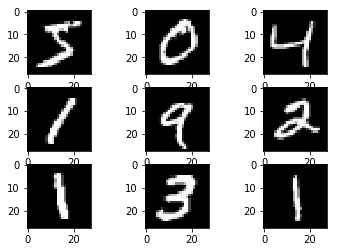

In [9]:
pyplot.show()

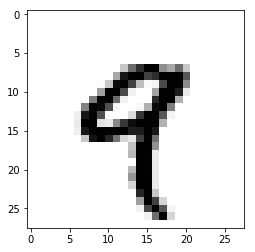

In [12]:
digit = train_images[4]
pyplot.imshow(digit, cmap=pyplot.cm.binary)
pyplot.show()

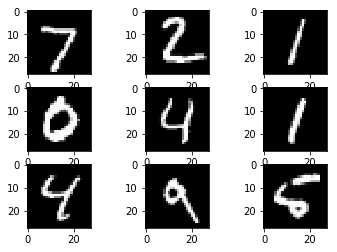

In [26]:
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(test_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [14]:
from keras import models
from keras import layers

In [15]:
#The network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Para preparar la red para el entrenamiento, debemos elegir tres cosas más, como parte del paso de compilación:
1. Una función de pérdida: cómo la red podrá medir su rendimiento en los datos de entrenamiento y, por lo tanto, cómo podrá dirigirse en la dirección correcta.
2. Un optimizador: el mecanismo a través del cual la red se actualizará en función de los datos que ve y su función de pérdida.
3. Métricas para monitorear durante el entrenamiento y las pruebas: aquí, solo nos preocuparemos por la precisión (la fracción de las imágenes que se clasificaron correctamente).

In [16]:
#The compilation step
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Antes de entrenar, procesaremos los datos previamente rediseñándolos en la forma que la red espera y ajustándolos para que todos los valores estén en el intervalo [0, 1]. Anteriormente, nuestras imágenes de entrenamiento, por ejemplo, se almacenaban en una matriz de formas (60000, 28, 28) de tipo uint8 con valores en el intervalo [0, 255]. Lo transformamos en una matriz de forma float32 (60000, 28 * 28) con valores entre 0 y 1.

In [27]:
#Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

También necesitamos codificar categóricamente las etiquetas

In [18]:
#Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Ahora estamos listos para entrenar a la red, lo que en Keras se realiza mediante una llamada al método de ajuste de la red: ajustamos el modelo a sus datos de entrenamiento:

In [19]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2572 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1025 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0682 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0496 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0366 - accuracy: 0.9886


Se muestran dos cantidades durante el entrenamiento: la pérdida de la red sobre los datos de entrenamiento y la precisión de la red sobre los datos de entrenamiento. Alcanzamos rápidamente una precisión de 0.989 (98.9%) en los datos de entrenamiento. Ahora verifiquemos que el modelo también funcione bien en el conjunto de prueba:



In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 55us/step


In [21]:
print('test_acc:', test_acc)

test_acc: 0.9771999716758728


La precisión del conjunto de prueba resulta ser del 97.8%, que es bastante menor que la precisión del conjunto de entrenamiento. Esta brecha entre la precisión del entrenamiento y la precisión de la prueba es un ejemplo de sobreajuste (overfitting): el hecho de que los modelos de aprendizaje automático tienden a funcionar peor en los nuevos datos que en sus datos de entrenamiento. 

Esto concluye nuestro primer ejemplo: usted acaba de ver cómo puede construir y entrenar una red neuronal para clasificar dígitos escritos a mano en menos de 20 líneas de código Python. 

In [29]:
# make class predictions with the model
predictions = network.predict_classes(test_images)
for i in range(10):
    print('%d (expected %d)' % (predictions[i], test_labels[i]))



7 (expected 7)
2 (expected 2)
1 (expected 1)
0 (expected 0)
4 (expected 4)
1 (expected 1)
4 (expected 4)
9 (expected 9)
5 (expected 5)
9 (expected 9)
